Importing Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

Reading Training Data

In [67]:
data_train = pd.read_csv("C:/Users/arghy/Downloads/train.csv")
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [68]:
data_train.shape

(14999, 9)

Graphical Data

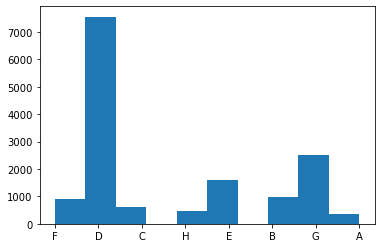

In [69]:
plt.hist(data_train["category"])
plt.show()

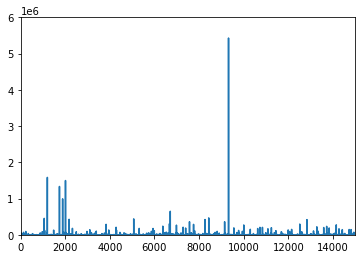

In [70]:
plt.plot(data_train["adview"])
plt.xlim(0, 15000)
plt.ylim(0, 6000000)
plt.show()

Removing Outliers

In [71]:
data_train = data_train[data_train["adview"] < 2000000]

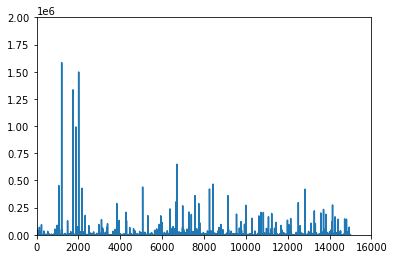

In [72]:
plt.plot(data_train["adview"])
plt.xlim(0, 16000)
plt.ylim(0, 2000000)
plt.show()

Cleaning Data

In [73]:
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']

In [74]:
data_train.shape

(14636, 9)

Changing Data to Numeric Type

In [75]:
category = {'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


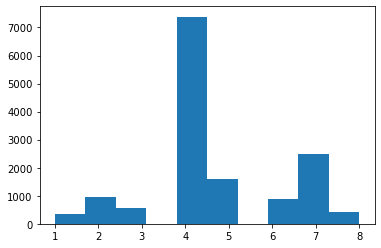

In [76]:
plt.hist(data_train["category"])
plt.show()

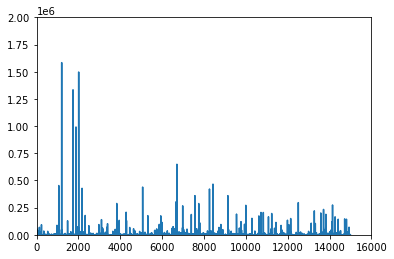

In [77]:
plt.plot(data_train["adview"])
plt.xlim(0, 16000)
plt.ylim(0, 2000000)
plt.show()

In [78]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [79]:
column_vidid = data_train['vidid']

In [80]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


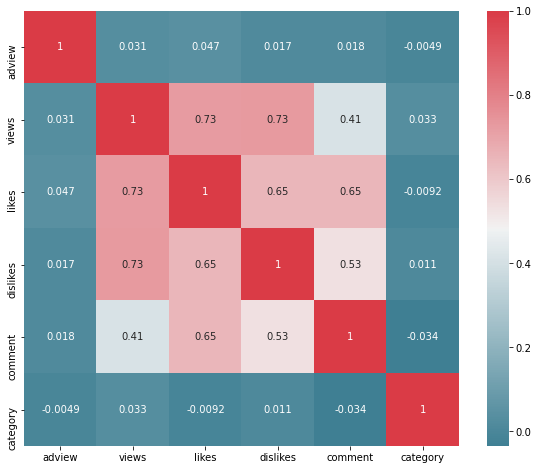

In [81]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True)
plt.show()

In [82]:
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

In [83]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


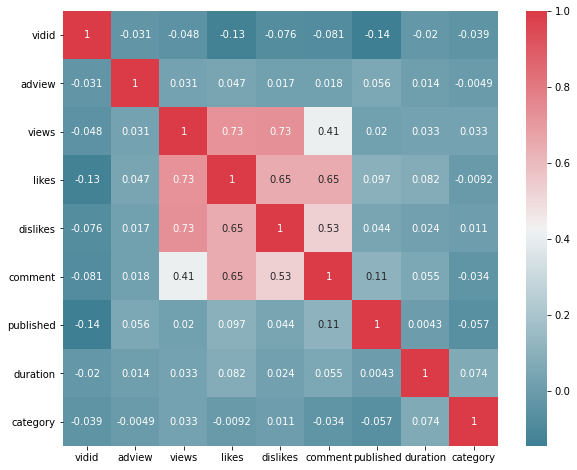

In [84]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True)
plt.show()

Changing Time into Seconds

In [85]:
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

mp = pd.read_csv("C:/Users/arghy/Downloads/train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)
data_train["duration"] = time1

In [86]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


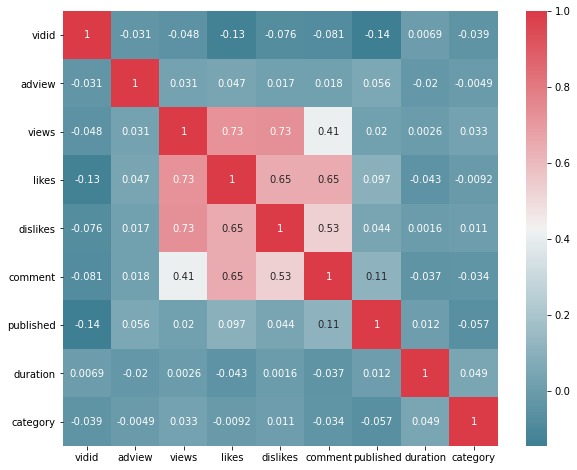

In [87]:
f, ax = plt.subplots(figsize = (10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True)
plt.show()

In [88]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
print(Y_train)

       target
0          40
1           2
2           1
3           6
4           1
...       ...
14631       2
14632       1
14633       4
14634       1
14635       1

[14636 rows x 1 columns]


In [89]:
data_train = data_train.drop(["adview"], axis = 1)
data_train = data_train.drop(["vidid"], axis = 1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


Splitting Dataset

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_train, Y_train, test_size = 0.2, random_state=42)

In [91]:
x_train.shape

(11708, 7)

In [92]:
x_test.shape

(2928, 7)

In [93]:
y_train.shape

(11708, 1)

In [94]:
y_test.shape

(2928, 1)

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [96]:
x_train.mean()

0.1739096800320488

In [97]:
x_test = scaler.fit_transform(x_test)
x_test

array([[7.17372469e-03, 8.63080853e-03, 3.31069610e-03, ...,
        1.54621849e-01, 1.32738468e-02, 4.28571429e-01],
       [3.43438476e-06, 1.06225336e-05, 0.00000000e+00, ...,
        8.59243697e-01, 3.68717968e-04, 5.71428571e-01],
       [4.17243632e-04, 7.32954817e-04, 1.13186191e-04, ...,
        5.37394958e-01, 3.31477453e-02, 1.42857143e-01],
       ...,
       [9.69235691e-04, 1.32781670e-04, 3.39558574e-04, ...,
        2.50840336e-01, 1.48593341e-02, 5.71428571e-01],
       [7.67152853e-04, 3.67008535e-03, 5.37634409e-04, ...,
        8.94117647e-01, 1.32001032e-02, 4.28571429e-01],
       [2.63138694e-03, 1.20034629e-03, 8.20599887e-04, ...,
        1.61764706e-01, 2.49990782e-02, 5.71428571e-01]])

In [98]:
x_test.mean()

0.17614792076344343

Function to Print Metrics

In [99]:
from sklearn import metrics
def print_error(prediction, y_test):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Using Various Prediction Models

In [100]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
prediction_linear = linear_regression.predict(x_test)
prediction_linear.reshape(2928, 1)
linear = y_test.copy(deep=True)
linear.loc[:, "Predicted_Linear"] = prediction_linear
linear

,target,Predicted_Linear
4791,5,-1041.402991
4800,2,2737.251198
3717,5,393.411148
8876,1,-1922.802367
8288,2,2375.227609
...,...,...
3694,1,3144.879862
4872,9,-1154.311955
6791,1,-945.546523
750,2,2944.532119


In [101]:
print_error(prediction_linear, y_test)

Mean Absolute Error: 3707.378005824533
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [102]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train, y_train)
prediction_vector = supportvector_regressor.predict(x_test)
vector = linear.copy(deep = True)
vector.loc[:, "Predicted_Vector"] = prediction_vector
vector

c:\Users\arghy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,target,Predicted_Linear,Predicted_Vector
4791,5,-1041.402991,2.833706
4800,2,2737.251198,1.560247
3717,5,393.411148,1.835278
8876,1,-1922.802367,2.573688
8288,2,2375.227609,1.554882
...,...,...,...
3694,1,3144.879862,1.939683
4872,9,-1154.311955,2.470844
6791,1,-945.546523,2.366544
750,2,2944.532119,1.794666


In [103]:
print_error(prediction_vector, y_test)

Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [104]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
prediction_tree = decision_tree.predict(x_test)
tree = vector.copy(deep=True)
tree.loc[:, "Predicted_Tree"] = prediction_tree
tree

,target,Predicted_Linear,Predicted_Vector,Predicted_Tree
4791,5,-1041.402991,2.833706,21.0
4800,2,2737.251198,1.560247,4.0
3717,5,393.411148,1.835278,6.0
8876,1,-1922.802367,2.573688,2.0
8288,2,2375.227609,1.554882,1.0
...,...,...,...,...
3694,1,3144.879862,1.939683,1.0
4872,9,-1154.311955,2.470844,13.0
6791,1,-945.546523,2.366544,1.0
750,2,2944.532119,1.794666,1.0


In [105]:
print_error(prediction_tree, y_test)

Mean Absolute Error: 2971.417349726776
Mean Squared Error: 1217367435.7459016
Root Mean Squared Error: 34890.79299393898


In [106]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split = 15, min_samples_leaf = 2)
random_forest.fit(x_train, y_train)
prediction_forest = random_forest.predict(x_test)
forest = tree.copy(deep=True)
forest.loc[:, "Predicted_Forest"] = prediction_forest
forest

<ipython-input-106-e7567be2ce60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


,target,Predicted_Linear,Predicted_Vector,Predicted_Tree,Predicted_Forest
4791,5,-1041.402991,2.833706,21.0,18.934926
4800,2,2737.251198,1.560247,4.0,32.098369
3717,5,393.411148,1.835278,6.0,6.099093
8876,1,-1922.802367,2.573688,2.0,6.933518
8288,2,2375.227609,1.554882,1.0,3475.301944
...,...,...,...,...,...
3694,1,3144.879862,1.939683,1.0,8930.388563
4872,9,-1154.311955,2.470844,13.0,185.761332
6791,1,-945.546523,2.366544,1.0,7.158329
750,2,2944.532119,1.794666,1.0,102.880694


In [107]:
print_error(prediction_forest, y_test)

Mean Absolute Error: 3299.243989617946
Mean Squared Error: 692739586.1931782
Root Mean Squared Error: 26319.94654616871


In [108]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
prediction_xgb = xgb_model.predict(x_test)
xgb = forest.copy(deep=True)
xgb.loc[:, "Predicted_XGB"] = prediction_xgb
xgb

c:\Users\arghy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\arghy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[12:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,target,Predicted_Linear,Predicted_Vector,Predicted_Tree,Predicted_Forest,Predicted_XGB
4791,5,-1041.402991,2.833706,21.0,18.934926,10
4800,2,2737.251198,1.560247,4.0,32.098369,1
3717,5,393.411148,1.835278,6.0,6.099093,4
8876,1,-1922.802367,2.573688,2.0,6.933518,1
8288,2,2375.227609,1.554882,1.0,3475.301944,1
...,...,...,...,...,...,...
3694,1,3144.879862,1.939683,1.0,8930.388563,1
4872,9,-1154.311955,2.470844,13.0,185.761332,30
6791,1,-945.546523,2.366544,1.0,7.158329,1
750,2,2944.532119,1.794666,1.0,102.880694,3


In [109]:
print_error(prediction_xgb, y_test)
print('F1 Score:', metrics.f1_score(y_test, prediction_xgb, average = 'weighted'))

Mean Absolute Error: 1704.9392076502731
Mean Squared Error: 833694216.1796448
Root Mean Squared Error: 28873.76345715336
F1 Score: 0.24252116459686482


In [110]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation = "relu", input_shape=x_train.shape[1:]), Dense(6, activation = "relu"), Dense(1)])
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ["mean_squared_error"])
history = ann.fit(x_train, y_train, epochs = 100)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767404544.0000 - mean_squared_error: 767404544.0000
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 767399168.0000 - mean_squared_error: 767399168.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767390784.0000 - mean_squared_error: 767390784.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767378624.0000 - mean_squared_error: 767378624.0000
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 767362368.0000 - mean_squared_error: 767362368.0000
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 767340544.0000 - mean_squared_error: 767340544.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767312128.0000 - mean_squared_error: 767312128.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767276224.0000 - mean_squared_error:

In [111]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 48        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [112]:
prediction_Neural = ann.predict(x_test)
Neural = xgb.copy(deep=True)
Neural.loc[:, "Predicted_Neural"] = prediction_Neural
Neural

,target,Predicted_Linear,Predicted_Vector,Predicted_Tree,Predicted_Forest,Predicted_XGB,Predicted_Neural
4791,5,-1041.402991,2.833706,21.0,18.934926,10,1029.640503
4800,2,2737.251198,1.560247,4.0,32.098369,1,2113.129150
3717,5,393.411148,1.835278,6.0,6.099093,4,1267.473877
8876,1,-1922.802367,2.573688,2.0,6.933518,1,847.950378
8288,2,2375.227609,1.554882,1.0,3475.301944,1,1922.246582
...,...,...,...,...,...,...,...
3694,1,3144.879862,1.939683,1.0,8930.388563,1,2100.345215
4872,9,-1154.311955,2.470844,13.0,185.761332,30,1130.573730
6791,1,-945.546523,2.366544,1.0,7.158329,1,1229.767822
750,2,2944.532119,1.794666,1.0,102.880694,3,2016.637817


In [113]:
print_error(prediction_Neural, y_test)

Mean Absolute Error: 3158.374573905937
Mean Squared Error: 829664127.5834129
Root Mean Squared Error: 28803.890841055014


From the various Models, the Random Forest Regressor has the least Mean Squared Error

Saving Random Forest Model

In [114]:
import joblib
joblib.dump(random_forest, "RandomForest_youtubeadview.pkl")

['RandomForest_youtubeadview.pkl']

Predicting on Test Data

In [115]:
data_test = pd.read_csv("C:/Users/arghy/Downloads/test.csv")
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [116]:
data_test.shape

(8764, 8)

In [117]:
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']

In [118]:
data_test.shape

(8549, 8)

In [119]:
category = {'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"] = data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [120]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [121]:
col_vidid = data_test['vidid']

In [122]:
from sklearn.preprocessing import LabelEncoder
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [123]:
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

mp = pd.read_csv("C:/Users/arghy/Downloads/test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time2 = time.apply(func_sec)
data_test["duration"] = time2

In [124]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [125]:
data_test = data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [126]:
test = data_test.copy(deep=True)
test = scaler.fit_transform(test)
test

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, ...,
        9.75296912e-01, 1.07451417e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, ...,
        8.66983373e-01, 9.29309552e-03, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, ...,
        4.79334917e-01, 5.49115462e-02, 4.28571429e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 3.07858868e-02, ...,
        8.66033254e-01, 1.03821302e-02, 7.14285714e-01],
       [3.17494650e-03, 5.12072284e-03, 4.19176637e-03, ...,
        8.20902613e-01, 4.59814622e-03, 4.28571429e-01],
       [2.34068537e-05, 3.74915644e-05, 2.77600422e-05, ...,
        9.48218527e-01, 1.47382687e-02, 4.28571429e-01]])

In [127]:
test.mean()

0.16965883079102045

In [128]:
saved_model = joblib.load("RandomForest_youtubeadview.pkl")
prediction = saved_model.predict(test)
data_test.loc[:, "Predicted_Adview"] = prediction
data_test

,views,likes,dislikes,comment,published,duration,category,Predicted_Adview
0,440238,6153,218,1377,2053,449,2,1735.745911
1,1040132,8171,340,1047,1825,389,6,1719.563515
2,28534,31,11,1,1009,2274,4,171.321158
3,1316715,2284,250,274,116,595,7,501.774322
4,1893173,2519,225,116,1892,188,2,1687.995802
...,...,...,...,...,...,...,...,...
8759,111205,471,14,101,231,194,3,5.868610
8760,1074457,1024,195,65,1800,8315,4,875.754975
8761,1891692,4606,1109,191,1823,434,6,1140.283474
8762,714859,1639,151,382,1728,195,4,707.810527


In [129]:
data_test.insert(loc = 0, column = 'vidid', value = col_vidid)
data_test

,vidid,views,likes,dislikes,comment,published,duration,category,Predicted_Adview
0,VID_1054,440238,6153,218,1377,2053,449,2,1735.745911
1,VID_18629,1040132,8171,340,1047,1825,389,6,1719.563515
2,VID_13967,28534,31,11,1,1009,2274,4,171.321158
3,VID_19442,1316715,2284,250,274,116,595,7,501.774322
4,VID_770,1893173,2519,225,116,1892,188,2,1687.995802
...,...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,231,194,3,5.868610
8760,VID_8195,1074457,1024,195,65,1800,8315,4,875.754975
8761,VID_18973,1891692,4606,1109,191,1823,434,6,1140.283474
8762,VID_5849,714859,1639,151,382,1728,195,4,707.810527


Saving Test Predictions

In [130]:
data_test.to_csv('predictions.csv')